# K-Mean Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [157]:
df=pd.read_csv(r'marketing_campaign.csv', sep = '\t')

In [158]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# examining the data, column ,shape and data types 

Examing 'MARKETING DATA'


(2240, 29)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


No duplicate in the dataset


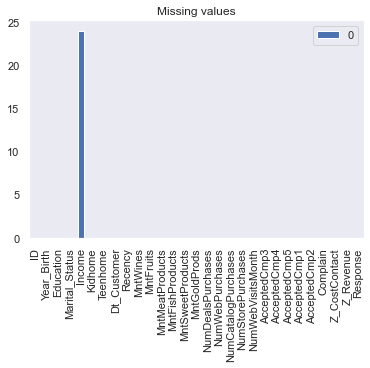

In [159]:
def examine_data(data, data_name='data'):
    print(f"Examing '{data_name}'")
    display(df.shape)
    display(df.columns)
    display(df.info())
    display(df.nunique())
    display(df.describe().transpose())
    
examine_data(df, data_name= 'MARKETING DATA')

# duplicate values
duplicate= df.duplicated().sum()
if duplicate == 0:
    print('No duplicate in the dataset')
else:
    print(f'{duplicate}Duplicate')
    
# missing values
missing= pd.DataFrame(round(df.isna().sum()))
if missing[0].sum() > 0:
        missing.plot(kind='bar')
        plt.title('Missing values')
        plt.grid()
else:
    print(f'There are no missing values in "{data_name}".') 

 'Z_CostContact', 'Z_Revenue', have the same values in all its column, we will drop columns like this that do not contribute to the model

In [160]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

Income column is not symmetric, it is skewed, so we cant fill with mean, lets just drop it 


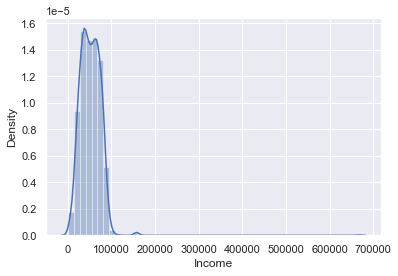

In [161]:
sns.distplot(df['Income']);

drop na

In [162]:
df.dropna(inplace=True)

* customer year of erollment with the company
*created a new column '2021' to get number of year customers have been patronising
*age of customers today
*total number of kids
*total product purchased
*total accepted campaign
*total method of purchase
*delete some redundant columns to reduce complexity of model


In [163]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['2021'] ='2021-01-01'
df['2021'] = pd.to_datetime(df['2021'])
df['Customers_engagement'] = (df['2021'].dt.year) - (df['Dt_Customer'].dt.year)  

df['Age'] = 2021 - df['Year_Birth']

df['Kids'] = df['Kidhome'] + df['Teenhome']
     
df['Total_expense'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts']  + df['MntGoldProds']

df['TotalAcceptedCmp'] = df['AcceptedCmp3'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp4'] 
+ df['AcceptedCmp5']

df['TotalNumOfPurchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
+ df['NumDealsPurchases']

df.drop(['ID','Year_Birth','Dt_Customer','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp1','AcceptedCmp2',
'AcceptedCmp4','AcceptedCmp5','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases',
'NumWebVisitsMonth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
'2021','Recency','Complain','Response'],axis=1, inplace=True)
df.head()

,Education,Marital_Status,Income,Customers_engagement,Age,Kids,Total_expense,TotalAcceptedCmp,TotalNumOfPurchase
0,Graduation,Single,58138.0,9,64,0,1441,0,22
1,Graduation,Single,46344.0,7,67,2,20,0,4
2,Graduation,Together,71613.0,8,56,0,713,0,20
3,Graduation,Together,26646.0,7,37,1,45,0,6
4,PhD,Married,58293.0,7,40,1,380,0,14


-replace values in column to a more precised category for 'marital_status'

-replace values in column to a more precised category for 'education'


In [164]:
print('Total categories in the feature marital status:\n', df['Marital_Status'].value_counts(),'\n')
print('Total categories in the feature education:\n', df.Education.value_counts())

df['Marital_Status']=df['Marital_Status'].replace(['Married', 'Together'],'In relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','YOLO', 'Absurd'],'Single')
df['Marital_Status'].value_counts()

df.Education =df.Education.replace(['Graduation','PhD','Master','2n Cycle'],'PG')
df.Education =df.Education.replace(['Basic'],'UG')

df.head()

Total categories in the feature marital status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


,Education,Marital_Status,Income,Customers_engagement,Age,Kids,Total_expense,TotalAcceptedCmp,TotalNumOfPurchase
0,PG,Single,58138.0,9,64,0,1441,0,22
1,PG,Single,46344.0,7,67,2,20,0,4
2,PG,In relationship,71613.0,8,56,0,713,0,20
3,PG,In relationship,26646.0,7,37,1,45,0,6
4,PG,In relationship,58293.0,7,40,1,380,0,14


In [165]:
df.shape


(2216, 9)

A bar to visualize the Education degree per Marital Statsus

In [166]:
fig = px.bar(df, x= 'Total_expense', y= 'Marital_Status', color = 'Education', barmode='group')
fig.update_layout(width=800, height=400, title='Marital Status vs Education ')
fig.show()

# Visualizing the ratios in relationship or single 

In [167]:
fig = px.pie(df, names= 'Marital_Status', title= 'Marital Status')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [168]:
fig = px.pie(df, names= 'Education', title= 'Education',hover_data=['Total_expense'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

detecting the outliers

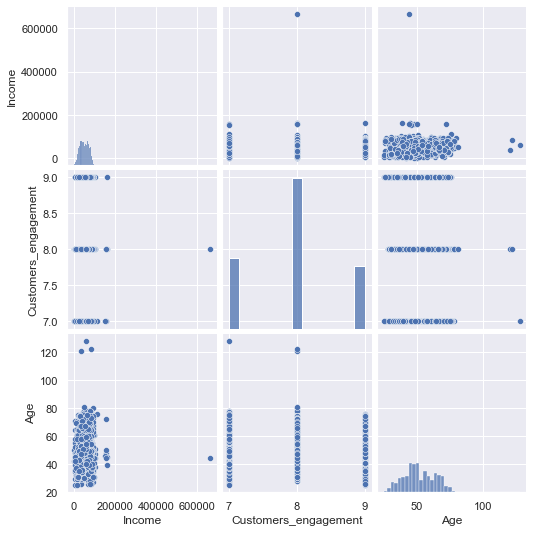

In [169]:
sns.pairplot(df, vars= ['Income','Customers_engagement','Age'])
plt.show();

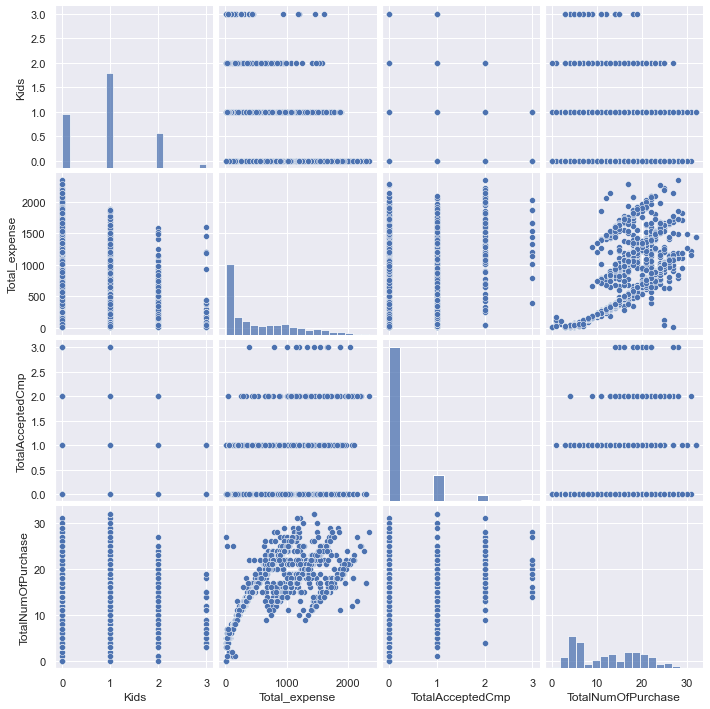

In [170]:
sns.pairplot(df, vars= ['Kids','Total_expense','TotalAcceptedCmp','TotalNumOfPurchase'])
plt.show();

from the visualized data we can conclude the outliers and remove them 


In [171]:
df = df[(df['Age']<100) & (df['Income']<600000)]
df.Age.max()

81

In [172]:
df.shape


(2212, 9)

In [173]:
obj =[]
for x in df.columns:
    if (df[x].dtypes == 'object'):
        obj.append(x)
print(obj)

['Education', 'Marital_Status']


-label encoding categorical variable

-created a copy of the data

In [174]:
label_encode =LabelEncoder()
for x in obj:
    df[x] = df[[x]].apply(label_encode.fit_transform)

df1=df.copy()

# scaling

In [175]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head()

,Education,Marital_Status,Income,Customers_engagement,Age,Kids,Total_expense,TotalAcceptedCmp,TotalNumOfPurchase
0,-0.158187,1.349603,0.287105,1.499086,1.018352,-1.264598,1.635802,-0.430132,1.309461
1,-0.158187,1.349603,-0.260882,-1.417341,1.274785,1.404572,-0.933518,-0.430132,-1.189221
2,-0.158187,-0.740959,0.913196,0.040872,0.334530,-1.264598,0.319500,-0.430132,1.031830
3,-0.158187,-0.740959,-1.176114,-1.417341,-1.289547,0.069987,-0.888315,-0.430132,-0.911590
4,-0.158187,-0.740959,0.294307,-1.417341,-1.033114,0.069987,-0.282599,-0.430132,0.198936


-using PCA to reduce dimensions, feature to 3 

-Convert into df

In [176]:
pca = PCA(n_components=3)
pca_a = pca.fit_transform(scaled_features_df)

pca_df = pd.DataFrame(pca_a, columns=['column1', 'column2', 'column3'])
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
column1,2212.0,4.200980e-17,1.749047,-3.288263,-1.605558,-0.305337,1.438642,5.099212
column2,2212.0,-4.557335e-17,1.108524,-2.869890,-0.713451,-0.093171,0.527696,5.753987
column3,2212.0,6.032948e-17,1.013374,-2.315184,-0.663936,-0.075154,0.779193,3.732229


# plot the reduced data

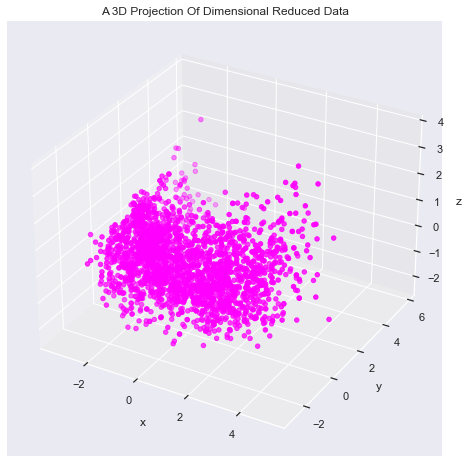

In [177]:
x = pca_df['column1']
y = pca_df['column2']
z = pca_df['column3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Dimensional Reduced Data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

We implement our model so. We need just one data

Number of cluster should be 2.We look the most increase where(you can look "elbow" rules)

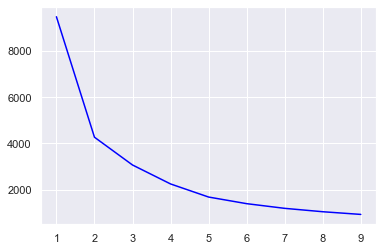

In [178]:
#We implement our model so. We need just one data
cluster_data_arg = {"x":x,"y":y}
cluster_data = pd.DataFrame(cluster_data_arg)
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color="blue")
plt.show()
#Number of cluster should be 2.We look the most increase where(you can look "elbow" rules)

as seen above our k=5

In [179]:
km = KMeans(n_clusters = 5)
y_predicted= km.fit_predict(df1)
df1['Cluster'] = y_predicted
df1['Cluster'] = 'cluster'+ df1['Cluster'].astype('str')
df1.head()

,Education,Marital_Status,Income,Customers_engagement,Age,Kids,Total_expense,TotalAcceptedCmp,TotalNumOfPurchase,Cluster
0,0,1,58138.0,9,64,0,1441,0,22,cluster3
1,0,1,46344.0,7,67,2,20,0,4,cluster2
2,0,0,71613.0,8,56,0,713,0,20,cluster0
3,0,0,26646.0,7,37,1,45,0,6,cluster1
4,0,0,58293.0,7,40,1,380,0,14,cluster3


# plotting the cluster

In [180]:
PLOT = go.Figure()
for C in list(df1.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = df1[df1.Cluster == C]['Income'],
                                y = df1[df1.Cluster == C]['Age'],
                                z = df1[df1.Cluster == C]['Total_expense'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Total_expense: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Age', titlefont_color = 'black'),
                                zaxis=dict(title = 'Expense', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))
PLOT.show()

selecting the features we need to culster

In [181]:
X = df.iloc[:, [2, 6]].values

abblying a Kmeans to the data with 5 clusters

In [182]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# ploting the five clusters with kmeans centroids

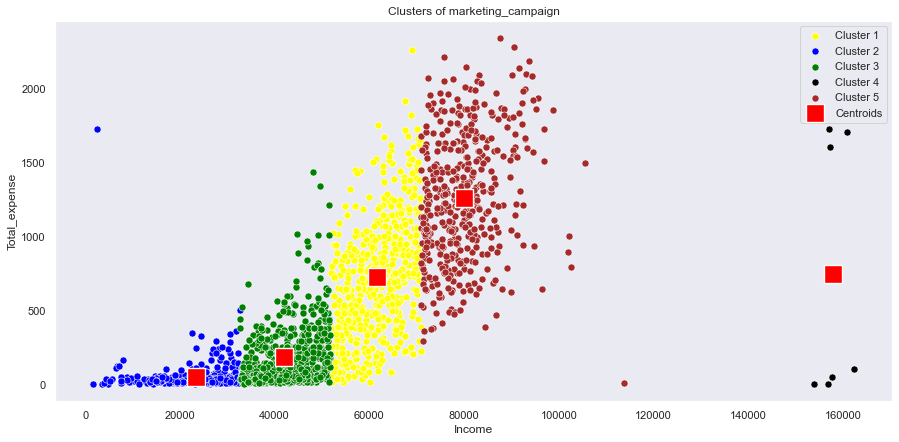

In [183]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'black', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'brown', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of marketing_campaign')
plt.xlabel('Income')
plt.ylabel('Total_expense')
plt.legend()
plt.show()
warnings.filterwarnings('ignore')

In [184]:
df1.head()


,Education,Marital_Status,Income,Customers_engagement,Age,Kids,Total_expense,TotalAcceptedCmp,TotalNumOfPurchase,Cluster
0,0,1,58138.0,9,64,0,1441,0,22,cluster3
1,0,1,46344.0,7,67,2,20,0,4,cluster2
2,0,0,71613.0,8,56,0,713,0,20,cluster0
3,0,0,26646.0,7,37,1,45,0,6,cluster1
4,0,0,58293.0,7,40,1,380,0,14,cluster3


# visualizing the clusters with countplot

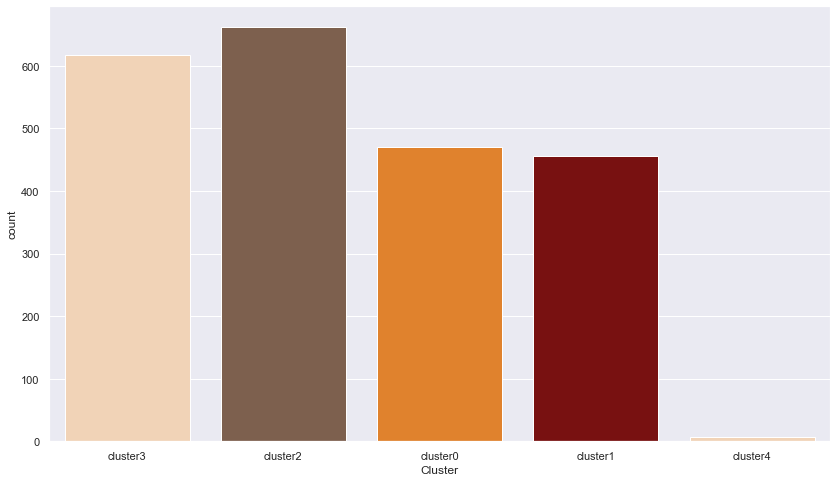

In [185]:
cl = ['#FAD3AE', '#855E46', '#FE800F', '#890000']
plt.figure(figsize=(14,8))
sns.countplot(x=df1['Cluster'], palette=cl);

# Hierarchical Clustering

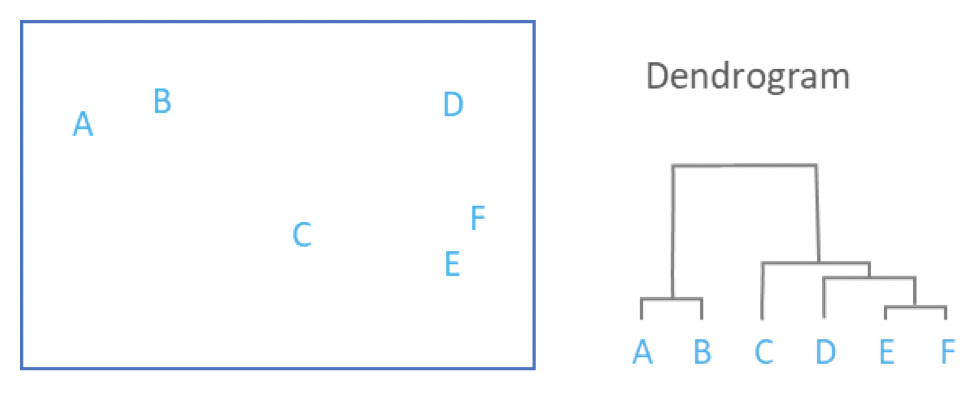

### Importing important libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

### Importing and reading our dataset
 using pd.read_csv function. Our aim is to segment the customers of a wholesale distributor based on their annual spending on diverse product categories like milk, grocery, region, etc.

In [2]:
data = pd.read_csv(r'C:\Users\CF\Downloads\Wholesale customers data.csv')
data.head().style.applymap(lambda x: "background-color: #f4e9f9")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Checking the number of records and features using .shape() function

In [3]:
data.shape

(440, 8)

### Normalizing our data to ensure the scale of each variable is the same
Why? Because otherwise, our model may become biased.

In [5]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head().style.applymap(lambda x: "background-color: #f4e9f9")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Now the variables are very near to eachother in the scale.

### Drawing a dendrogram

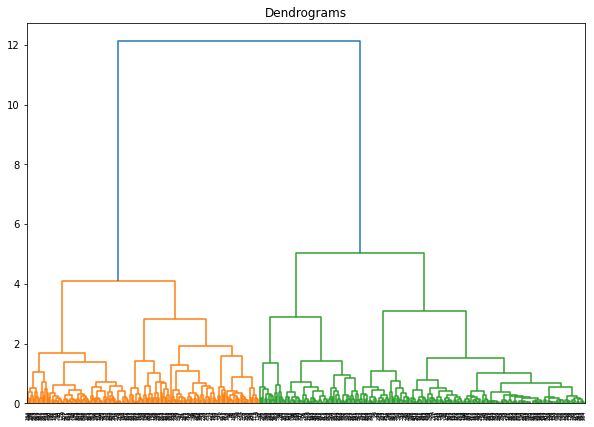

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis represents the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line therefore we can decide a threshold of 6.

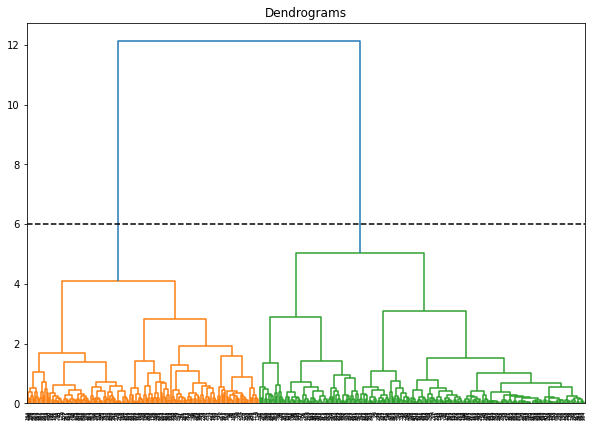

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='k', linestyle='--')

The line we used to cut the dendrogram cuts through 2 points, and hence we have 2 clusters

### Applying hierarchical clustering using 2 clusters

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Since we specified 2 clusters, the output array contains only 0s and 1s. 0 represents points that belong to the first cluster and 1 represents points in the second cluster.

### Visualizing our clusters using a scatter plot

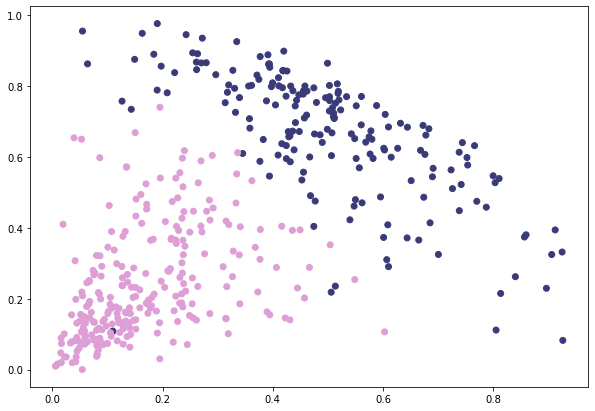

In [9]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_, cmap = "tab20b_r") 